In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm, ks_2samp
     
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

df_rnn = pd.read_csv("output_wfss_rnn.csv")
df_var = pd.read_csv("output_var.csv")
df_market_price = pd.read_csv("market_price.csv")

# Get rid of not predicted elements
df_market_price = df_market_price[1095:]
df_var = df_var[1095:]
df_rnn = df_rnn[1095:]

print("len(var):", len(df_var))
print("len(df_rnn):", len(df_rnn))
print("len(df_market_price):", len(df_market_price))

font = { 'family' : 'normal',
         'weight' : 'normal',
         'size' : 20 }
matplotlib.rc('font', **font)

len(var): 1578
len(df_rnn): 1578
len(df_market_price): 1578


In [19]:
df_error_var = pd.DataFrame(df_market_price['MarketPrice'] - df_var['VAR-Prediction'])
df_error_var = pd.DataFrame(df_error_var)
df_error_var.columns = ['VAR prediction errors normalized histogram']
mu, std = norm.fit(df_error_var.values)
x = np.linspace(-200, 150, 150 + 200)
df_line = pd.DataFrame(norm.pdf(x, mu, std/2))
df_line.index = range(-200, 150)
df_line.columns = ['Fitted normal distribution']
# ax = df_line.plot.line(color = 'red')
# df_error_var.plot.hist(ax = ax, normed = True, bins = 20, alpha = 0.6)

In [20]:
df_error_rnn = pd.DataFrame(df_market_price['MarketPrice'] - df_rnn['RNN-Prediction'])
df_error_rnn = pd.DataFrame(df_error_rnn)
df_error_rnn.columns = ['RNN prediction errors normalized histogram']
mu, std = norm.fit(df_error_rnn.values)
x = np.linspace(-200, 150, 150 + 200)
df_line = pd.DataFrame(norm.pdf(x, mu, std/2))
df_line.index = range(-200, 150)
df_line.columns = ['Fitted normal distribution']
# ax = df_line.plot.line(color = 'red', figsize = (30, 16))
# df_error_rnn.plot.hist(ax = ax, normed = True, bins = 20, alpha = 0.6)

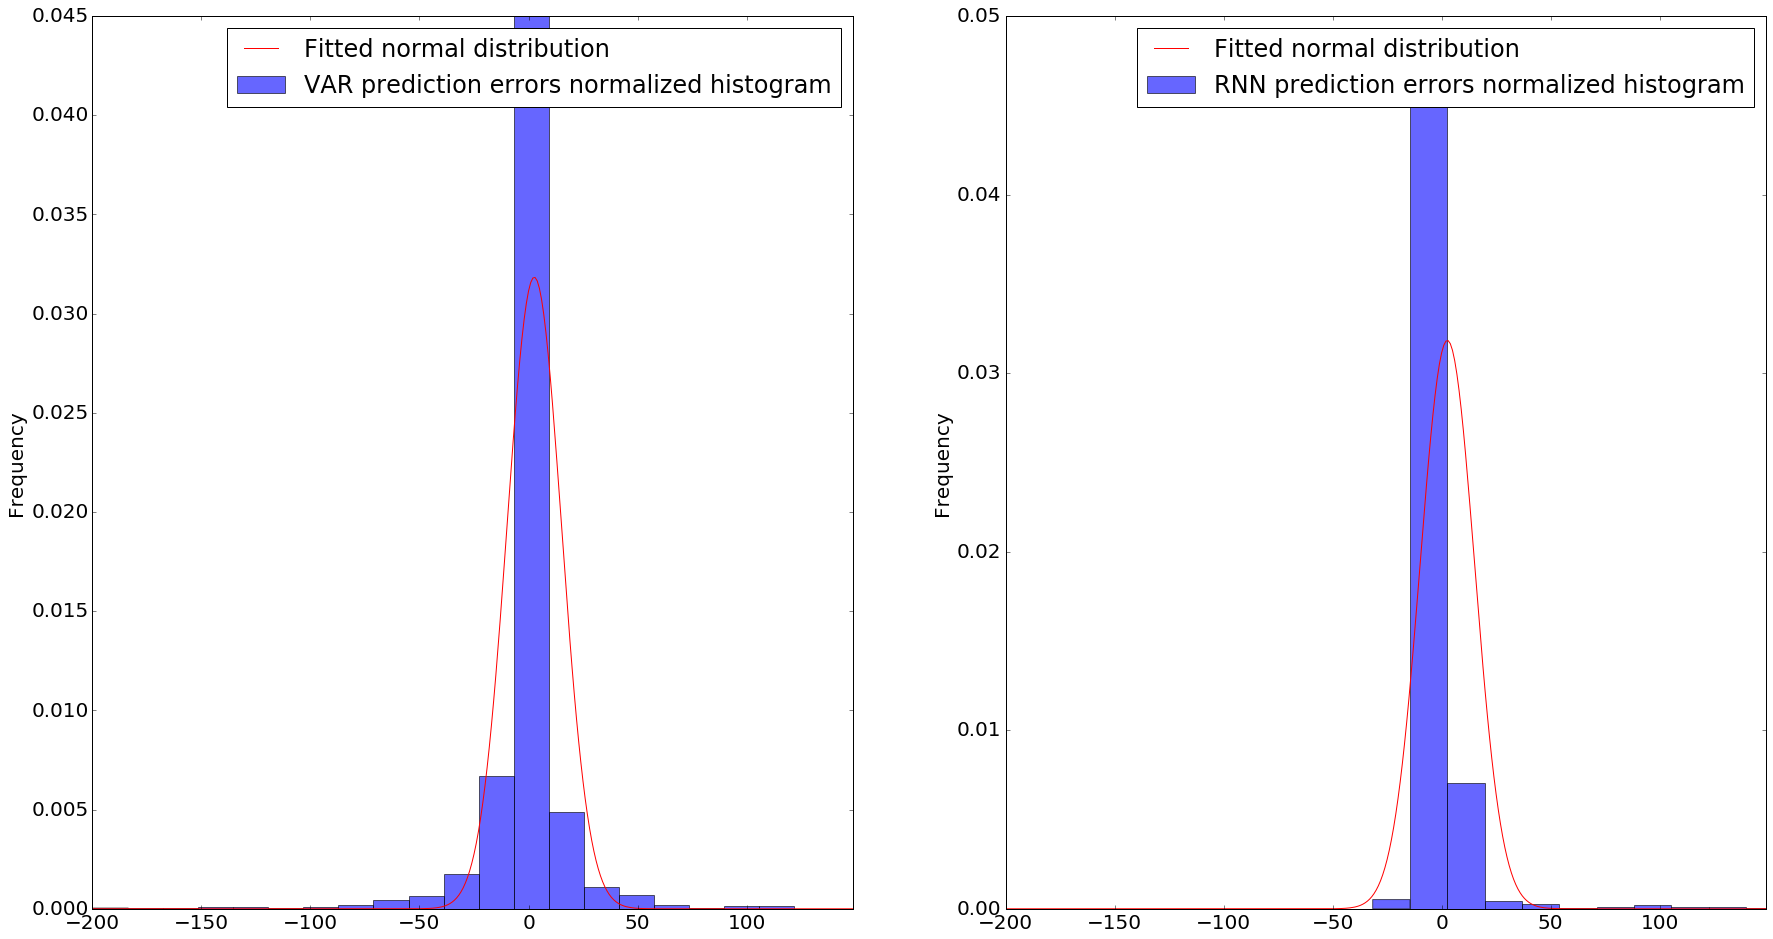

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 16))

df_line.plot.line(ax = axes[0], color = 'red')
df_error_var.plot.hist(ax = axes[0], normed = True, bins = 20, alpha = 0.6)

df_line.plot.line(ax = axes[1], color = 'red')
df_error_rnn.plot.hist(ax = axes[1], normed = True, bins = 20, alpha = 0.6)